In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,horizontal_flip=True,vertical_flip=True,shear_range=0.5)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input,horizontal_flip=True,vertical_flip=True,shear_range=0.5)

In [3]:
traindata = train_gen.flow_from_directory('data/train/',target_size=(224,224),batch_size=16)


Found 4188 images belonging to 4 classes.


In [4]:
traindata.class_indices

{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}

In [5]:
test_data = val_gen.flow_from_directory('data/test/',target_size=(224,224),batch_size=16)

Found 2915 images belonging to 4 classes.


In [6]:
baseModel = VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))
baseModel.trainable = False

Metal device set to: Apple M1


2022-04-07 18:57:25.469563: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-07 18:57:25.469721: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
baseModel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:

model = tf.keras.Sequential()
model.add(baseModel)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(25,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='softmax'))

In [9]:
hist = model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                1254450   
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 104       
Total params: 15,970,517
Trainable params: 1,255,829
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
hist = model.fit(traindata,epochs=15,validation_data=test_data)

2022-04-07 18:57:29.962423: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-07 18:57:29.962543: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-07 18:57:30.123309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/15
262/262 [==============================] - ETA: 0s - loss: 0.6030 - accuracy: 0.8579

2022-04-07 18:58:41.082549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


262/262 [==============================] - 120s 457ms/step - loss: 0.6030 - accuracy: 0.8579 - val_loss: 0.4167 - val_accuracy: 0.9005
Epoch 2/15
262/262 [==============================] - 118s 451ms/step - loss: 0.3082 - accuracy: 0.9138 - val_loss: 0.1804 - val_accuracy: 0.9444
Epoch 3/15
262/262 [==============================] - 118s 450ms/step - loss: 0.2150 - accuracy: 0.9360 - val_loss: 0.1413 - val_accuracy: 0.9616
Epoch 4/15
262/262 [==============================] - 118s 450ms/step - loss: 0.1964 - accuracy: 0.9489 - val_loss: 0.1043 - val_accuracy: 0.9678
Epoch 5/15
262/262 [==============================] - 118s 449ms/step - loss: 0.1502 - accuracy: 0.9553 - val_loss: 0.1008 - val_accuracy: 0.9732
Epoch 6/15
262/262 [==============================] - 118s 449ms/step - loss: 0.1408 - accuracy: 0.9570 - val_loss: 0.1251 - val_accuracy: 0.9630
Epoch 7/15
262/262 [==============================] - 117s 447ms/step - loss: 0.1183 - accuracy: 0.9623 - val_loss: 0.1415 - val_accura

KeyboardInterrupt: 

In [13]:
def predict(filepath):
    test_image = image.load_img(path=filepath,target_size=(224,224))
    image_array = image.img_to_array(test_image)
    #image_array = image_array / 255
    print(image_array.shape)
    image_array_exp = np.expand_dims(image_array,axis=0)
    result = model.predict(image_array_exp)
    #print(result)
    plt.imshow(test_image)
    plt.xlabel(class_labels[np.argmax(result)])

In [14]:
class_labels = []
for class_label,class_mode in traindata.class_indices.items():
    print(class_label)
    class_labels.append(class_label)

Blight
Common_Rust
Gray_Leaf_Spot
Healthy


(224, 224, 3)


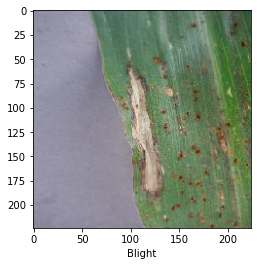

In [23]:
predict('data/test/Blight/Corn_Blight (1004).JPG')

(224, 224, 3)


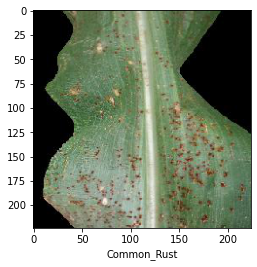

In [16]:
    predict('data/test/Common_Rust/Corn_Common_Rust (1027).JPG')

(224, 224, 3)


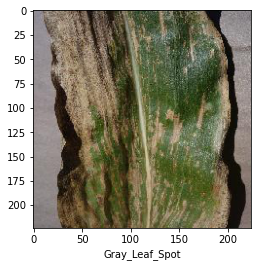

In [17]:
predict('data/test/Gray_Leaf_Spot/Corn_Gray_Spot (400).JPG')

(224, 224, 3)


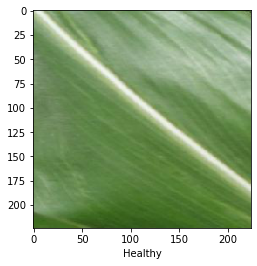

In [18]:
    predict('data/test/Healthy/Corn_Health (25).jpg')

In [19]:
predict('data/Gray_Leaf_Spot/Corn_Gray_Spot (115).JPG')

FileNotFoundError: [Errno 2] No such file or directory: 'data/Gray_Leaf_Spot/Corn_Gray_Spot (115).JPG'

In [ ]:
predict('data/Gray_Leaf_Spot/Corn_Gray_Spot (107).JPG')

In [ ]:
predict('data/Gray_Leaf_Spot/Corn_Gray_Spot (108).JPG')

In [ ]:
predict('data/Healthy/Corn_Health (310).JPG')

In [24]:
model.save('corn.h5')

In [25]:
from tensorflow.keras.models import load_model
savedmodel = load_model('corn.h5')

In [26]:
savedmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                1254450   
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 104       
Total params: 15,970,517
Trainable params: 1,255,829
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
traindata = train_gen.flow_from_directory('/Users/saibalaji/Desktop/data/train/',target_size=(224,224),batch_size=16)

In [ ]:
#testdata = test_gen.flow_from_directory('/Users/saibalaji/Desktop/data/test/',target_size=(224,224),batch_size=16)

In [ ]:
class_labels = []
for class_label,class_mode in traindata.class_indices.items():
    print(class_label)
    class_labels.append(class_label)

In [ ]:
nmodel = tf.keras.Sequential()
for layer in savedmodel.layers[0:-1]:
    print(layer)
    nmodel.add(layer)

In [ ]:
nmodel.summary()

In [ ]:
for layer in nmodel.layers[0:-2]:
    layer.trainable = False
print(nmodel.summary())

In [ ]:

nmodel.add(tf.keras.layers.Dense(units=4,name='cf',activation='softmax'))

In [ ]:
nmodel.summary()

In [ ]:
nmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
nmodel.fit(traindata,epochs=5)

In [ ]:
def predict(filepath):
    test_image = image.load_img(path=filepath,target_size=(224,224))
    image_array = image.img_to_array(test_image)
    #image_array = image_array / 255
    print(image_array.shape)
    image_array_exp = np.expand_dims(image_array,axis=0)
    result = nmodel.predict(image_array_exp)
    print(result)
    plt.imshow(test_image)
    plt.xlabel(class_labels[np.argmax(result)])

In [ ]:
predict('/Users/saibalaji/Desktop/data/train/diseased cotton plant/dd (1)_iaip.jpg')

In [ ]:
predict('data/Blight/Corn_Blight (1).jpeg')

In [ ]:
predict('data/Common_Rust/Corn_Common_Rust (1).jpg')

In [ ]:
predict('data/Gray_Leaf_Spot/Corn_Gray_Spot (101).JPG')

In [ ]:
predict('data/Healthy/Corn_Health (10).jpg')

In [ ]:
predict('data/Gray_Leaf_Spot/Corn_Gray_Spot (100).JPG')